#                       `Workforce Management `

### Importing the nessescary packages

In [294]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

### Reading dataset

In [295]:
df=pd.read_csv(r"Emp_ATTR.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [296]:
education={1 :'Below College',2 :'College',3 :'Bachelor',4 :'Master',5 :'Doctor'}
EnvironmentSatisfaction={1 :'Low',2 :'Medium',3 :'High',4 :'Very High'}
JobInvolvement={1 :'Low',2 :'Medium',3: 'High',4: 'Very High'}
PerformanceRating={1:'Low',2 :'Good',3: 'Excellent',4 :'Outstanding'}
RelationshipSatisfaction={1:'Low',2 :'Medium',3 :'High',4 :'Very High'}

### Information about the dataset

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Cleaning the irrelavants`

In [298]:
df.drop(columns=["EmployeeCount","EmployeeNumber","Over18","StandardHours"],inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


### Statistics

In [299]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [300]:
df.isnull().sum()   #no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### DATA VISUALIZATION

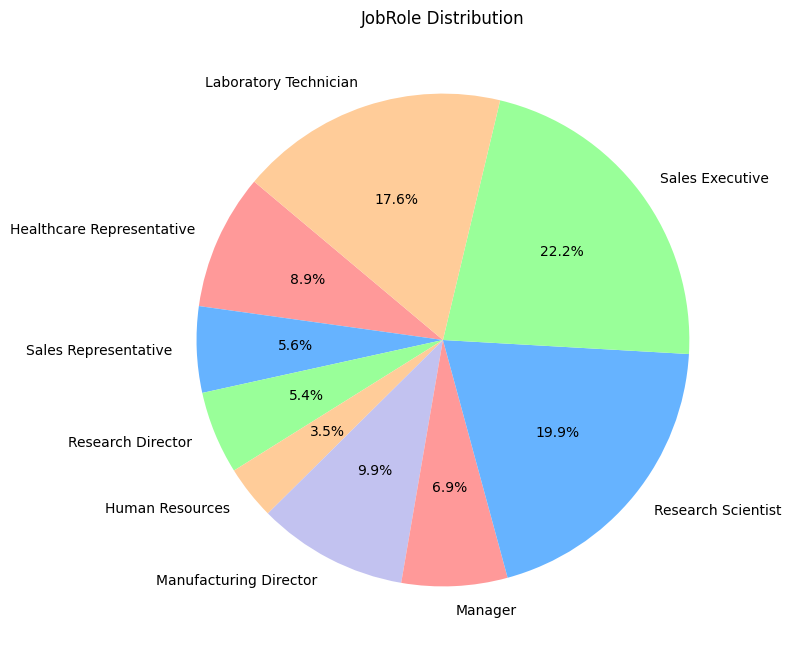

In [301]:
# JOB ROLE
label = set(df["JobRole"])
labels=list(df["JobRole"])
sizes = []
for i in label:
    sizes.append(labels.count(i))

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=label, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('JobRole Distribution')
plt.show()

### Seperating numerical and categorical

In [302]:
numdf=df.select_dtypes(include='number')
numdf

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [303]:
catdf=df.select_dtypes(include='object')
catdf

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


### Testing for Normalization Pattern

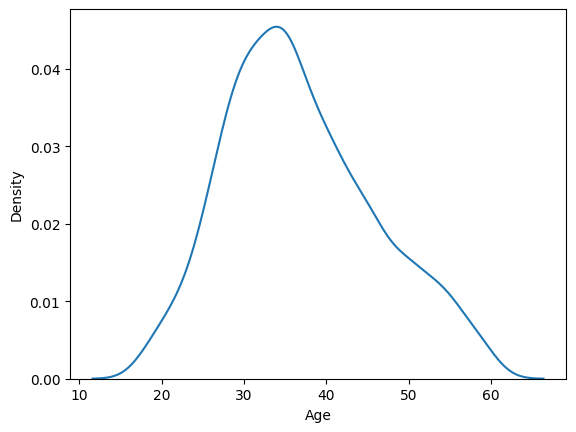

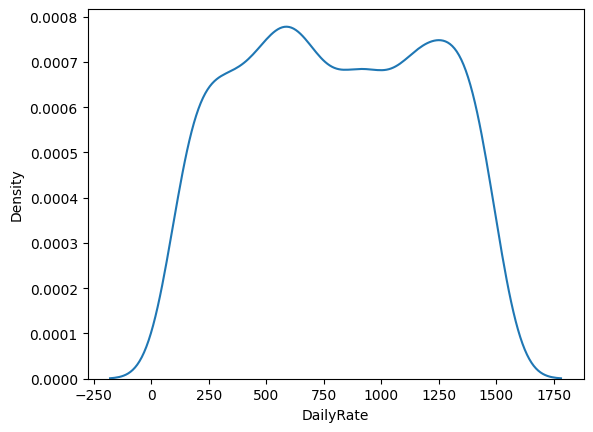

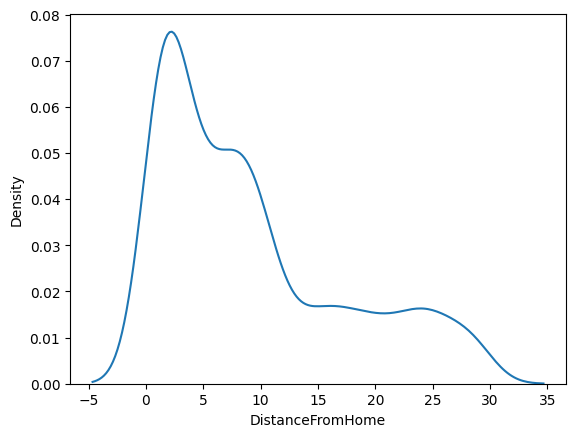

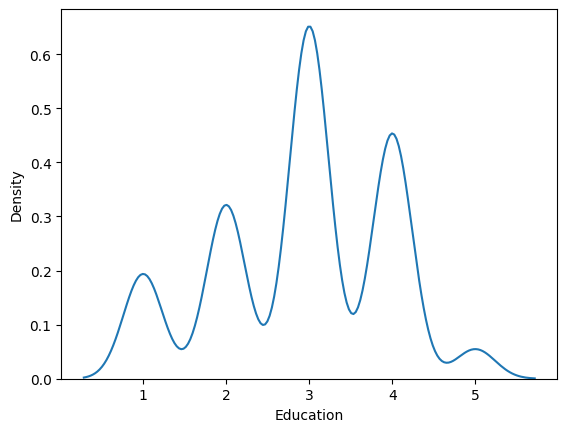

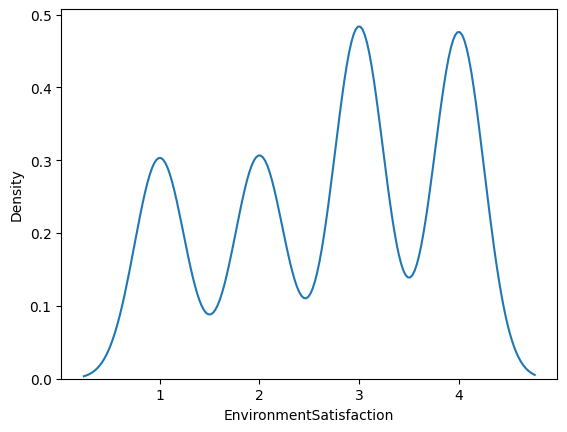

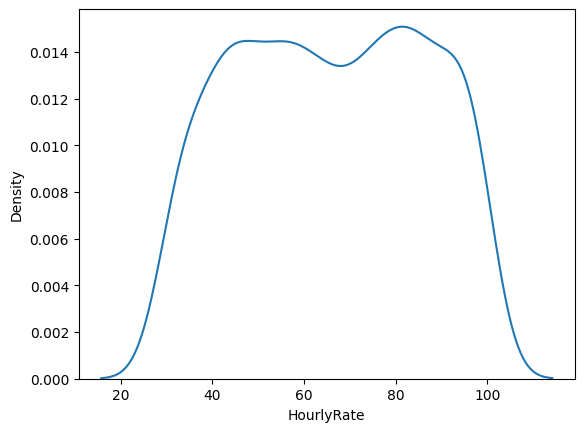

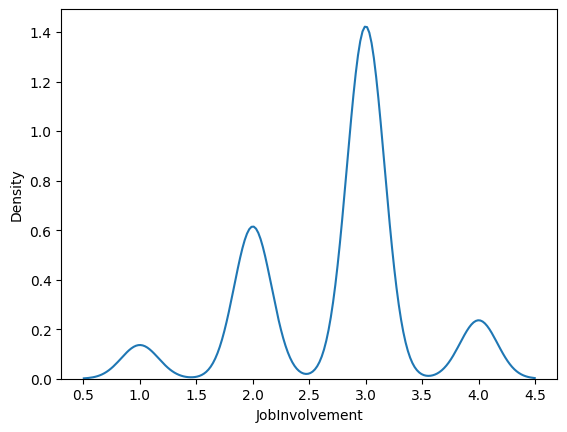

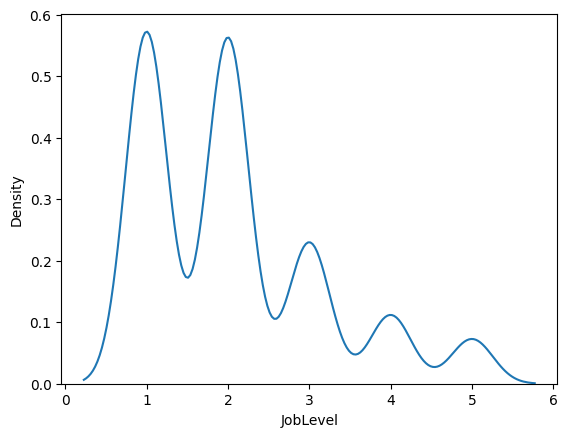

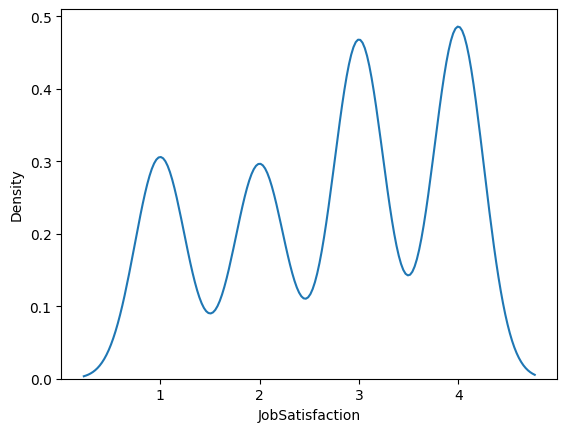

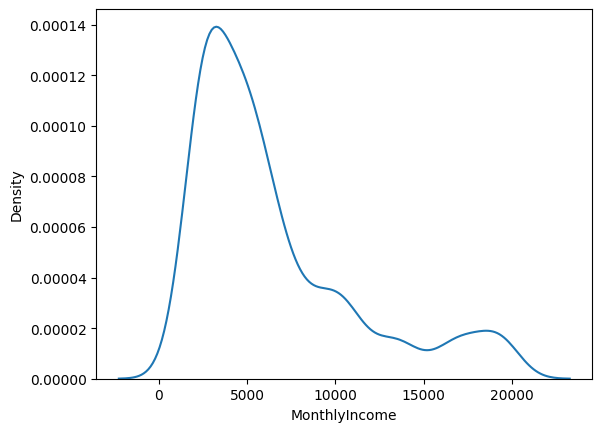

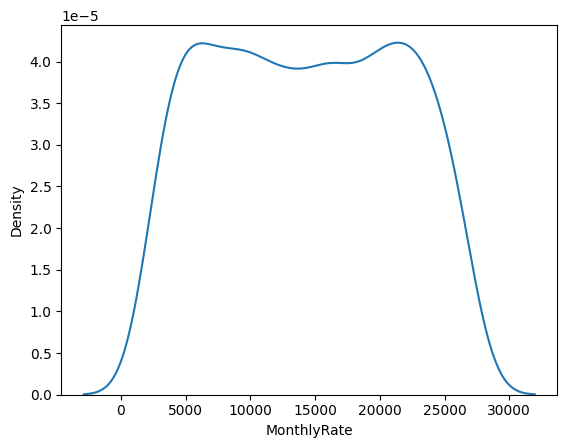

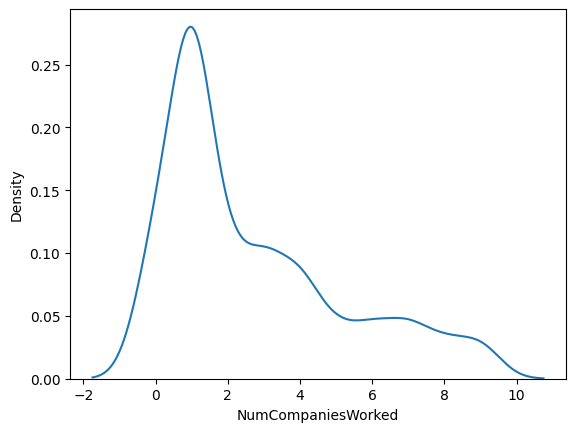

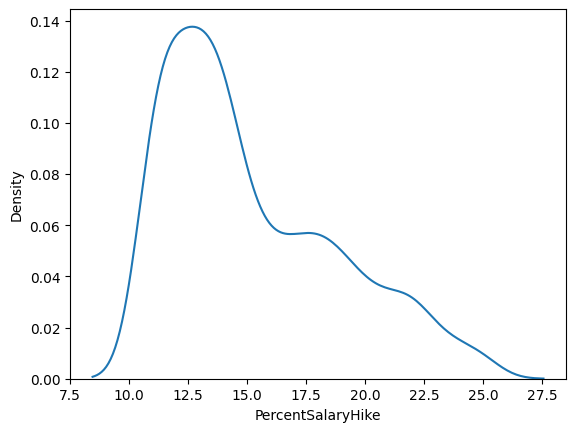

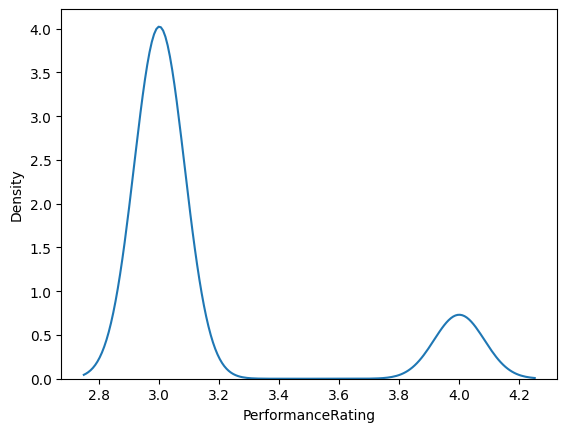

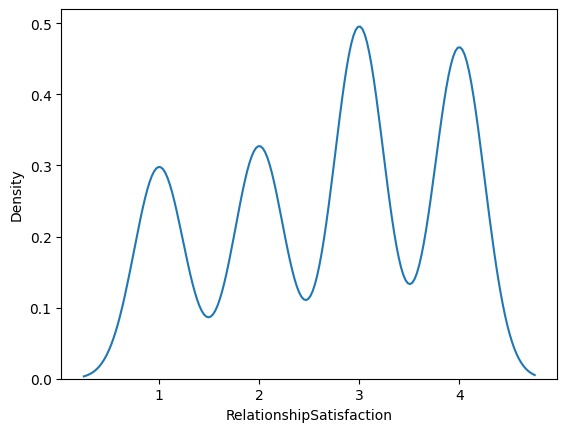

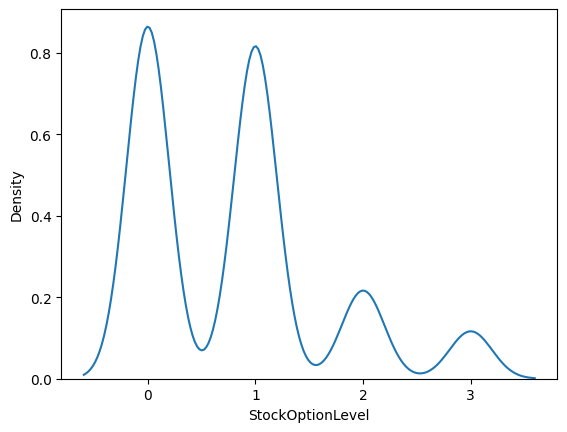

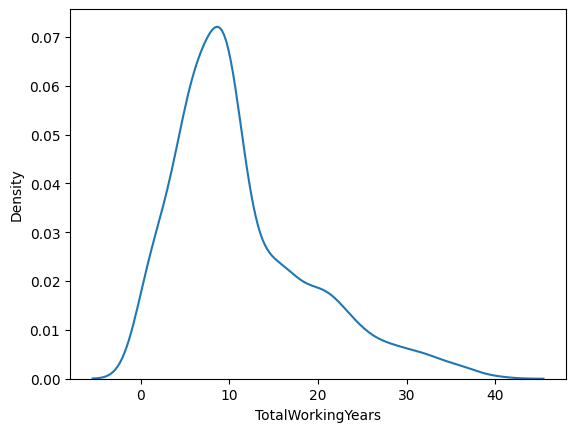

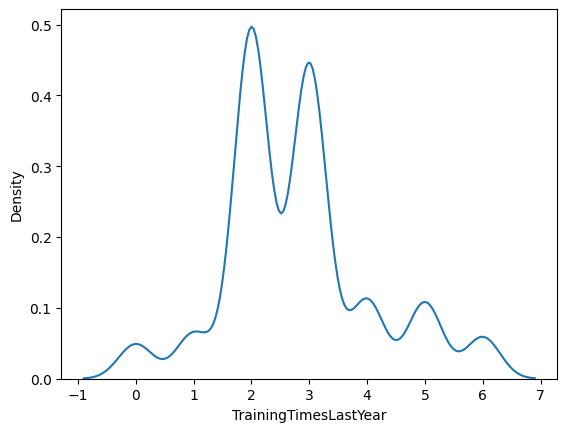

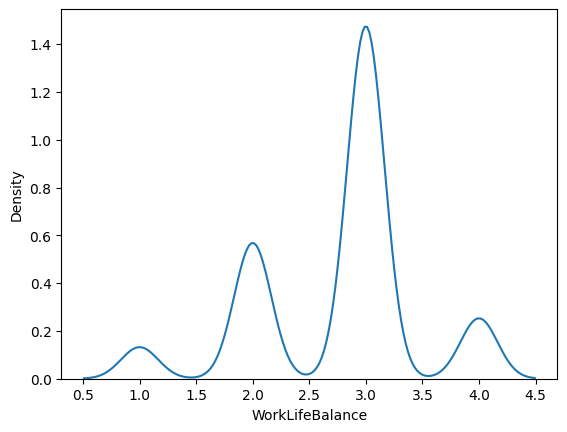

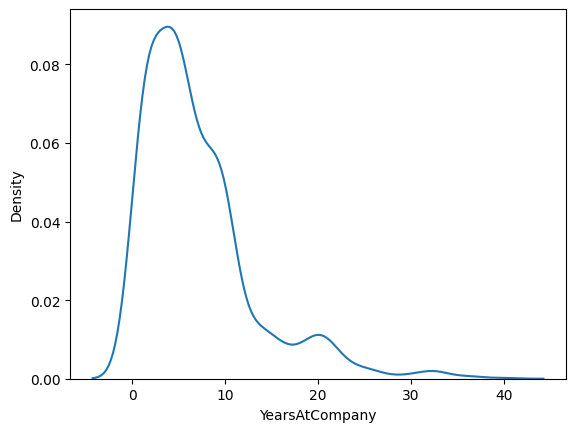

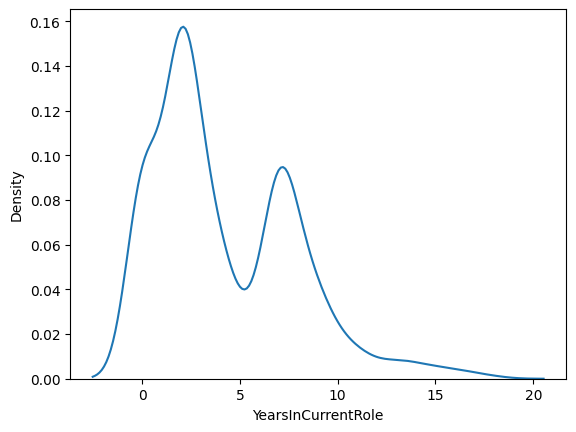

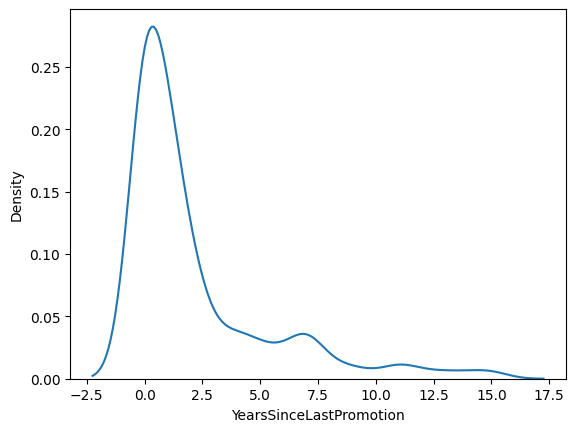

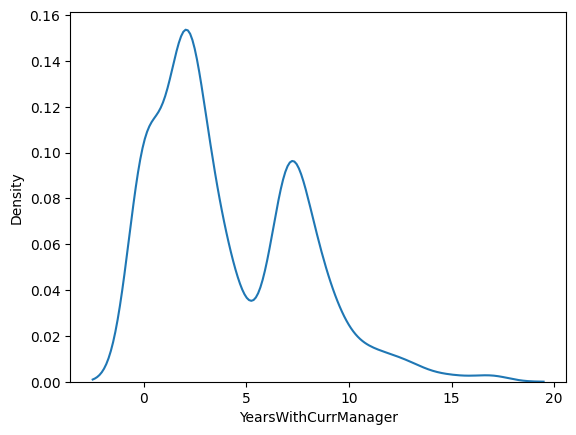

In [304]:
for i in numdf.columns:
    sns.kdeplot(numdf[i])
    plt.show()

### Normalization and Standardization

In [305]:
scaler = MinMaxScaler()
N_numdf = scaler.fit_transform(numdf)
N_numdf

array([[0.54761905, 0.71581961, 0.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.12670007, 0.25      , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 0.37652112, 0.25      , ..., 0.16666667, 0.06666667,
        0.11764706]], shape=(1470, 23))

In [306]:
sscaler = StandardScaler()
std_numdf = sscaler.fit_transform(N_numdf)
std_numdf=pd.DataFrame(std_numdf)
std_numdf

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,...,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,...,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,...,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,...,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


### Categorical Encoding using LABEL ENCODER

In [307]:
label_encoder = LabelEncoder()
categorical_array=[]
for cat in catdf.columns:
    loc=list(catdf[cat])
    enc_lc=label_encoder.fit_transform(loc)
    categorical_array.append(enc_lc)
Label_encoded_categorical=pd.DataFrame(categorical_array)

In [308]:
Label_encoded_categorical=Label_encoded_categorical.transpose()
Label_encoded_categorical

,0,1,2,3,4,5,6,7
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


### Concatenating both Encoded numerical and categorical

In [309]:
enc_df=pd.DataFrame()
enc_df=pd.concat([std_numdf,Label_encoded_categorical],axis=1)
col=list(numdf.columns)+list(catdf.columns)
enc_df.columns=col
enc_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.679146,0.245834,1,2,2,1,0,7,2,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.368715,0.806541,0,1,1,1,1,6,1,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,-0.679146,-1.155935,1,2,1,4,1,2,2,1
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,0.252146,-1.155935,0,1,1,1,0,6,1,1
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,-0.058285,-0.595227,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,...,-0.679146,-0.314873,0,1,1,3,1,2,1,0
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,...,-0.368715,0.806541,0,2,1,3,1,0,1,0
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,...,-0.679146,-0.314873,0,2,1,1,1,4,1,1
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,...,-0.679146,1.086895,0,1,2,3,1,7,1,0


## Training and Testing 

In [310]:
x=enc_df.drop(columns='Attrition')
y=enc_df['Attrition']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=50)

In [311]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1029, 30)
(441, 30)
(1029,)
(441,)


## MODEL BUILDING 
`Classification Problem: `
* Model used is `Logistic Regression`

In [312]:
Model_log=LogisticRegression(max_iter=110,solver="newton-cg")
Model_log.fit(xtrain,ytrain)

LogisticRegression(max_iter=110, solver='newton-cg')

In [313]:
ypred=Model_log.predict(xtest)
yprob = Model_log.predict_proba(xtest)[:, 1]

In [314]:
accuracy = accuracy_score(ytest, ypred)

precision = precision_score(ytest, ypred)

recall = recall_score(ytest, ypred)

f1 = f1_score(ytest, ypred)

conf_matrix = confusion_matrix(ytest, ypred)

roc_auc = roc_auc_score(ytest, yprob)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC Score"],
    "Value": [accuracy*100, precision*100, recall*100, f1*100, roc_auc*100]
})

metrics_df["Value"] = metrics_df["Value"].round(4)
metrics_df

,Metric,Value
0,Accuracy,87.3016
1,Precision,66.6667
2,Recall,42.2535
3,F1 Score,51.7241
4,ROC-AUC Score,83.5287


### Computing ROC curve

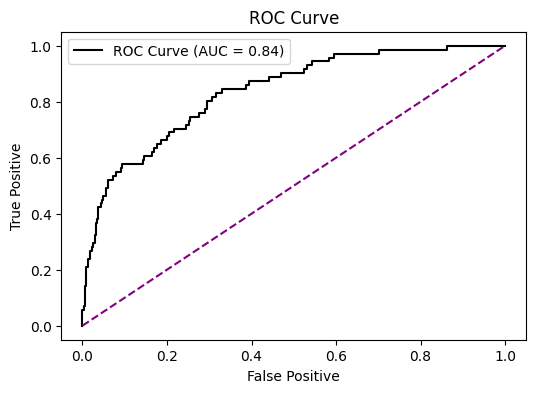

In [315]:
fpr, tpr, _ = roc_curve(ytest, yprob)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='black', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='purple')
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

We got `87` percent accuracy score and `66` percent precision 

## RANDOM FOREST CLASSIFICATION MODEL

In [316]:
ran=RandomForestClassifier(n_estimators=100)
ran.fit(xtrain,ytrain)


RandomForestClassifier()

In [317]:
y_pred=ran.predict(xtest)
y_prob = ran.predict_proba(xtest)[:, 1]

In [318]:
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
conf_matrix = confusion_matrix(ytest, y_pred)
roc_auc = roc_auc_score(ytest, y_prob)
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC Score"],
    "Value": [accuracy*100, precision*100, recall*100, f1*100, roc_auc*100]
})
metrics_df["Value"] = metrics_df["Value"].round(4)
metrics_df

,Metric,Value
0,Accuracy,84.5805
1,Precision,63.6364
2,Recall,9.8592
3,F1 Score,17.0732
4,ROC-AUC Score,79.9619


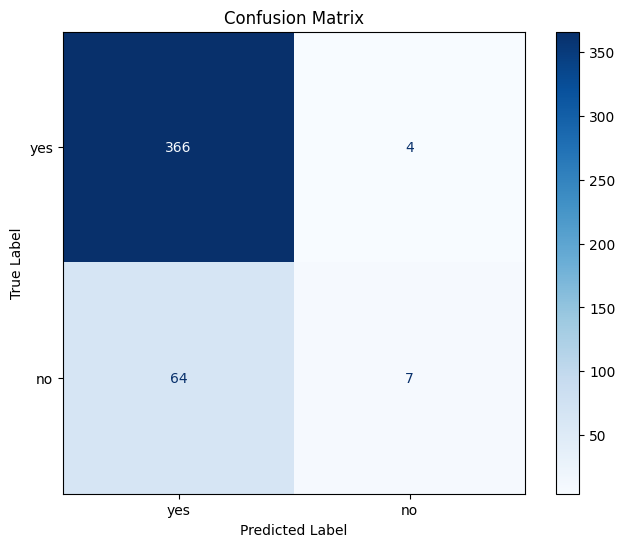

In [319]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes','no'])
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
